In [1]:
from astropy.table import QTable, Table, Column
import matplotlib.pyplot as plt
import numpy as np

# II) Potentiometer excercise
   *constants*

In [2]:
R13 = 10000 #ohms
Vin = 5 #volts

*measurements*

In [3]:
turns = [0,1,2,2.5,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
Vout  = [.0004, .0004, .0004, .049, .17, .34, .688, 1.06, \
         1.39, 1.78, 2.12, 2.48, 2.88, 3.24, 3.6, 4.0, 4.36, 4.76, 4.98] #volts

# Solving for $R_{12}$ and $R_{23}$ as a function of $V_{out}$
##### $R_{12} + R_{23} = R_{13}$
##### $V_{out} = V_{In} \cdot R_{23}/(R_{12} + R_{23})$
##### $V_{out} = V_{In} \cdot R_{23}/(R_{13} - R_{23} + R_{23})$
##### $V_{out} = V_{In} \cdot R_{23}/R_{13}$
## $ R_{23} = V_{out} \cdot R_{13} / V_{In}$

In [4]:
R23 = [x*R13/Vin for x in Vout]
R12 = [R13 - x for x in R23]

In [5]:
arr = {'turns':turns,'Vout':Vout,'R12': R12, 'R23': R23}
t = Table(arr)
t['R12'].info.format = '.1f'
t['R23'].info.format = '.1f'
print(t)

turns  Vout   R12    R23  
----- ------ ------ ------
  0.0 0.0004 9999.2    0.8
  1.0 0.0004 9999.2    0.8
  2.0 0.0004 9999.2    0.8
  2.5  0.049 9902.0   98.0
  3.0   0.17 9660.0  340.0
  4.0   0.34 9320.0  680.0
  5.0  0.688 8624.0 1376.0
  6.0   1.06 7880.0 2120.0
  7.0   1.39 7220.0 2780.0
  8.0   1.78 6440.0 3560.0
  9.0   2.12 5760.0 4240.0
 10.0   2.48 5040.0 4960.0
 11.0   2.88 4240.0 5760.0
 12.0   3.24 3520.0 6480.0
 13.0    3.6 2800.0 7200.0
 14.0    4.0 2000.0 8000.0
 15.0   4.36 1280.0 8720.0
 16.0   4.76  480.0 9520.0
 17.0   4.98   40.0 9960.0


Text(0.5, 1.0, 'Resistances within a $10k\\Omega$ Potentiometer')

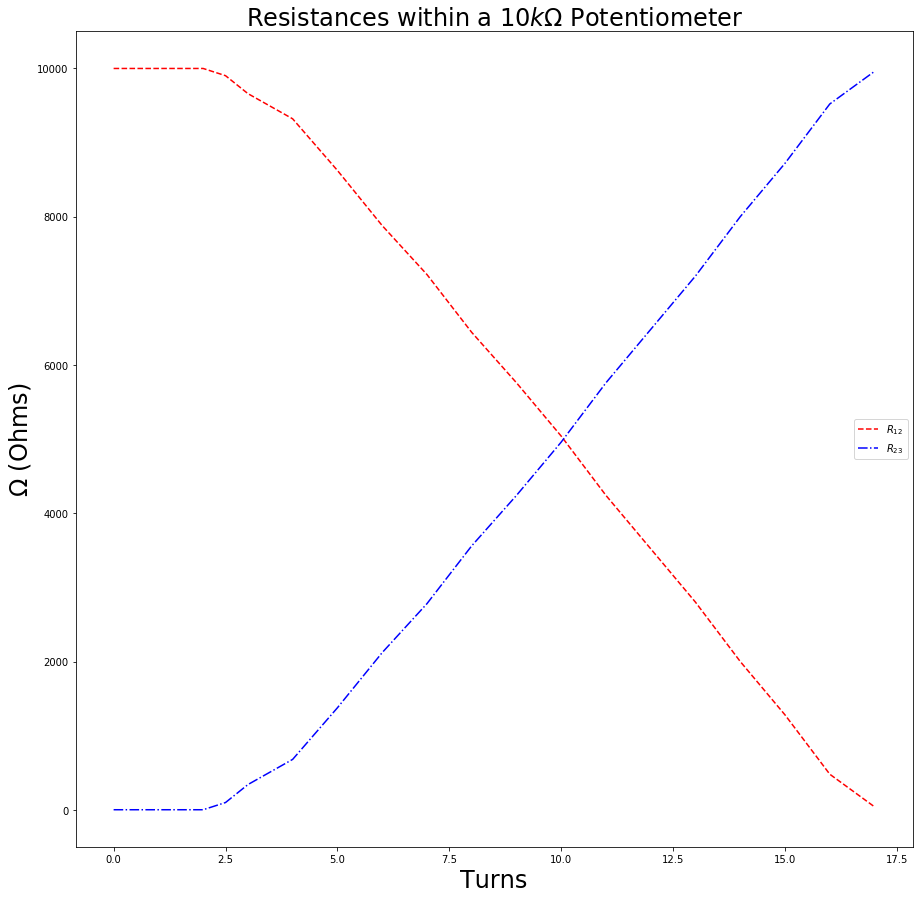

In [6]:
plt.figure(0, figsize = (15,15))
plt.plot(turns, R12, 'r--', label = '$R_{12}$') 
plt.plot(turns, R23, 'b-.', label = '$R_{23}$')
plt.xlabel('Turns', fontsize = 24)
plt.ylabel('$\Omega$ (Ohms)', fontsize = 24)
plt.legend()
plt.title('Resistances within a $10k\Omega$ Potentiometer', fontsize = 24)

# III) RC Circuit

In [7]:
Vin = 1 #volt
R1 = 10000 #oms
C = .1e-6 #farads
Hz = [10,20,50,100,200,500,1000,2000,5000,10000]
Vout=[1,.992,.960,.848,.632,.312,.164,.0832,.0338,.017]
dt = [1e-3,.97e-3,.95e-3,.872e-3,.696e-3,.396e-3,.224e-3,.118e-3,.049e-3,.0244e-3]
gain = Vout #Vin=1
phase_m = [360*dt[i]*Hz[i] for i in range(len(dt))]
phase_th = [np.arctan(2*np.pi*x*R1*C)*180/np.pi for x in Hz]

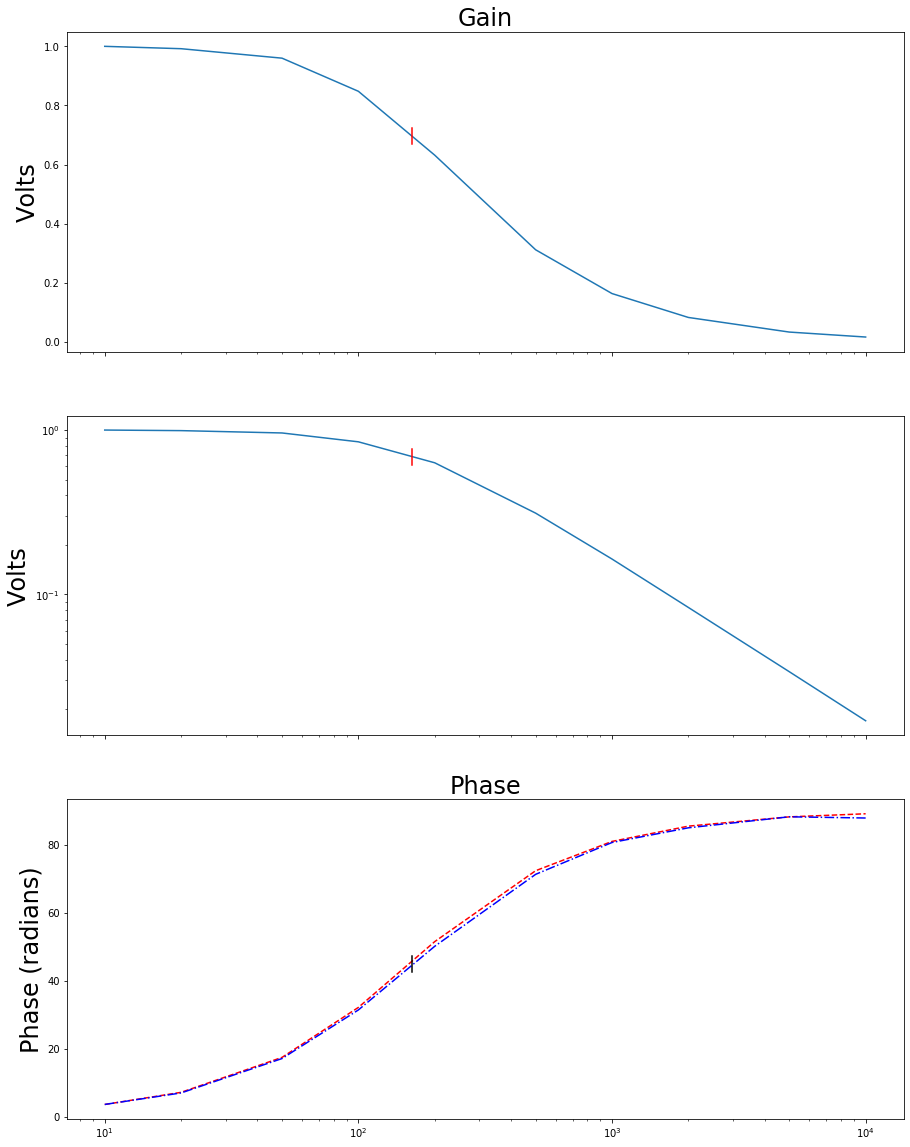

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex = True, figsize = (15,20))
ax1.semilogx(Hz,Vout)
ax1.set_ylabel('Volts', fontsize = 24)
ax1.set_title('Gain', fontsize = 24)
ax1.axvline(162,.65,.7, color ='r')
ax2.loglog(Hz,Vout)
ax2.set_ylabel('Volts', fontsize = 24)
ax2.axvline(162,.845,.895, color ='r')
ax3.semilogx(Hz,phase_th, 'r--', Hz,phase_m, 'b-.', )
ax3.set_ylabel('Phase (radians)', fontsize = 24)
ax3.set_title('Phase', fontsize = 24)
ax3.axvline(162,.46,.51, color ='k')

In [13]:
!git commit -m "Lab 1 tables and graphs"

[master (root-commit) fd787cc] Lab 1 tables and graphs
 4 files changed, 13748 insertions(+)
 create mode 100644 Lab1/.ipynb_checkpoints/Lab1-checkpoint.ipynb
 create mode 100644 Lab1/Lab1.html
 create mode 100644 Lab1/Lab1.ipynb
 create mode 100644 Lab1/Lab1.py
